## Alunos
Caio Ueda Sampaio, 802215, BCC <br>
Lucas Maciel Balieiro, 800534, BCC <br>
Vinícius de Oliveira Guimarães, 802431, BCC <br>
Gabriel Kusumota Nadalin, 819498, BCC <br>


## LINK PARA DOCUMENTO DO DOCS COM OS RESULTADOS OBTIDOS
https://docs.google.com/document/d/131Kxmy65S11JbK1kRUspa4AL8dAHf4pKSKOKIZBeIyk/edit?usp=sharing

# Maximum Sum Subsequence
Subsequência de soma máxima

Dado um array [A1, A2 …An], onde N é o total de valores de inteiros (Tamanho total do array), a implementação tem como objetivo encontrar o maior valor possível da soma de uma subsequência S crescente, de tamanho K, de forma que S1 ≤ S2 ≤ S3 ≤ S4 ≤ .... ≤ Sk (Ou seja, os elementos da subsequência tem que ser crescente).

### Entrada
O conjunto de entrada contém apenas um caso teste. A primeira linha contém um valor: o tamanho do array (Que também é a quantidade de elementos para serem lidos)
A segunda linha contém o tamanho da subsequência S, representado por K.
A última linha contém a lista dos elementos para serem inseridos no array.

### Saída
A saída do programa vai contém apenas o maior valor possível encontrado para a soma da sub sequência.

Exemplo:

```python
// Tamanho total do array
8
// Tamanho da sub sequência
3
// Elementos do array
8 5 9 10 5 6 21 8
```

A saída para o exemplo mostrado é **40**. <br>
Isso se dá pois temos para K=3, a subquência [9,10,21] que gera o valor de soma máximo igual a 40.


## Programação dinâmica

Se tratando de uma implementação que utiliza programação dinâmica, onde resultados anteriores são guardados para cálculos futuros, é importante ter cuidado na hora da paralelização.
<br><br>
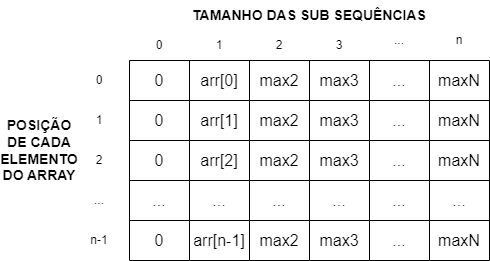

# Código Sequencial

In [ ]:
%%writefile main.c
#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <time.h>
#include <limits.h>

// Define a função max
int max(int a, int b) {
    return (a > b) ? a : b;
}

// Retorna, dado o array, a quantidade de elementos do array e o tamanho permitido para subsequencias
// o valor máximo possível para a soma dessa subsequencia
int MaxIncreasingSub(int arr[], int n, int k) {
    int **dp, ans = -1;

    // Alocação de memória para o array de ponteiros de inteiros (Matriz)
    dp = (int **) malloc(n * sizeof(int*));

    // Aqui teremos uma matriz de n linhas com k+1 colunas
    // (Começamos com k+1 pois é importante durante o cálculo usando programação dinâmica)
    for (int i = 0; i < n; i++) {
        dp[i] = (int *) malloc((k+1) * sizeof(int));
    }

    // Cada linha i da matriz dp vai representar o elemento arr[i]
    // As k+1 colunas vão representar a soma máxima da subsequência de tamanho igual ao número da coluna.
    // Por exemplo: A posição dp[3][2] vai representar a soma máxima da subsequência de tamanho 2 que termina em arr[3].
    // Da mesma forma, a posição dp[5][3] vai representar a soma máxima da subsequência de tamanho 3 que termina em arr[5]

    // Inicializa os valores das somas máximas de cada sub sequência de tamanho 0 até k como sendo -1.
    // -1 é apenas para indicar que não calculamos nenhuma sub sequência para o determinado tamanho.
    for (int i = 0; i < n; i++) {
        for (int j = 0; j <= k; j++) { // Corrige o loop para iterar até 'k'
            dp[i][j] = -1;
        }
    }

    // Aqui, na coluna 1 de cada linha i, iremos adicionar o próprio valor
    // do elemento arr[i] como sendo a soma máxima da sub sequência de tamanho 1 para o determinado elemento i.
    // Isso é possível pois, a máxima soma da sub sequência de tamanho 1 que inicializa na posição i é o próprio elemento arr[i]
    for (int i = 0; i < n; i++) {
        dp[i][1] = arr[i];
    }

    printf("Inicialização completa.\n");

    // Aqui, para cada elemento do array, iremos verificar os elementos anteriores a ele:
    for (int i = 1; i < n; i++) {
        for (int j = 0; j < i; j++) {
            // Se o elemento anterior é menor ou igual ao elemento atual1
            if (arr[j] <= arr[i]) {
                // Para cada tamanho possível de sub sequênciais
                for (int l = 1; l <= k-1; l++) {
                    // Para cada tamanho l das sub sequências, vamos verificar se já tem soma para essa sub sequência
                    if (dp[j][l] != -1) {
                        // Se já tiver, então a soma máxima para a subsequência de tamanho l+1 para o elemento da posição i
                        // vai ser o máximo entre o valor que já está lá e a soma do valor máximo da sub sequência
                        // que termina na posição j e que tem tamanho l com o elemento da posição i
                        dp[i][l + 1] = max(dp[i][l+1], dp[j][l] + arr[i]);
                    }
                }
            }
        }
    }


    // Após a aplicação ao algoritmo, teremos o valor da soma máxima para a sequência de tamanho k
    // que termina em cada um dos elementos i, na posição k da matriz dp.
    // O soma máxima de cada subsequência está na posição k pois criamos a matriz com k+1 colunas.
    for (int i = 0; i < n; i++) {
        ans = max(ans, dp[i][k]);
    }

    // Libera a memória alocada pelo algoritmo
    for (int i = 0; i < n; i++) {
        free(dp[i]);
    }
    free(dp);

    // Retorna o valor da soma máxima encontrado (Com relação a todas as subsequências de tamanho k)
    return ans;
}

int main(int argc, char *argv[]) {
    // int arr[] = {8, 5, 9, 10, 5, 6, 21, 8}; // Corrigido para usar inicialização correta do array

    if (argc < 2) {
        printf("Uso: %s <tamanho do array>\n", argv[0]);
        return 1;
    }

    int arraySize = atoi(argv[1]);

    int *arr;
    int n = arraySize;
    arr = (int *) malloc(n * sizeof(int));

    // Inicializar a semente do gerador de números aleatórios uma única vez
    srand((unsigned)time(NULL));

    // Preencher o array com números aleatórios
    for (int i = 0; i < n; i++) {
        arr[i] = rand() % (INT_MAX / 3); // Gera um número aleatório entre 0 e INT_MAX / 3
    }

    int res = MaxIncreasingSub(arr, n, 3);
    printf("%d\n", res);

    return 0;
}


Writing main.c


In [ ]:
%%bash
gcc -o main -fopenmp main.c

# Executando o programa com diferentes tamanhos de array
for tamanho in 1000 10000 100000
do
  time ./main $tamanho
done

Inicialização completa.
2137184321
Inicialização completa.
2146236546
Inicialização completa.
2147436875



real	0m0.007s
user	0m0.006s
sys	0m0.001s

real	0m0.642s
user	0m0.641s
sys	0m0.001s

real	1m14.413s
user	1m13.581s
sys	0m0.031s


# Código paralelo utilizando OpenMp

A ideia de utilização do OpenMP é para conseguir paralelizar a inicialização da matriz e também a realização dos cálculos de programação dinâmica (Apesar de ser um problema que utiliza programação dinâmica, queremos analisar os resultados da execução com paralelização usando região crítica)

In [ ]:
%%writefile openmpmain.c

#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <time.h>
#include <omp.h> // Inclui o suporte do OpenMP
#include <limits.h>

// Define a função max
int max(int a, int b) {
    return (a > b) ? a : b;
}

// Retorna, dado o array, a quantidade de elementos do array e o tamanho permitido para subsequencias
// o valor máximo possível para a soma dessa subsequencia
int MaxIncreasingSub(int arr[], int n, int k) {
    int **dp, ans = -1;

    // Alocação de memória para o array de ponteiros de inteiros (Matriz)
    dp = (int **) malloc(n * sizeof(int*));

    // Aqui teremos uma matriz de n linhas com k+1 colunas
    for (int i = 0; i < n; i++) {
        dp[i] = (int *) malloc((k+1) * sizeof(int));
    }

    // Inicializa os valores das somas máximas de cada sub sequência de tamanho 0 até k como sendo -1.
    // ATENÇÃO: VERIFICAR SE O COLLAPSE É BOM PARA O CASO ONDE TEMOS U
    #pragma omp parallel for collapse(2) // Paraleliza o loop duplo ()
    for (int i = 0; i < n; i++) {
        for (int j = 0; j <= k; j++) {
            dp[i][j] = -1;
        }
    }

    // Inicializa a coluna 1 de cada linha i com o próprio valor do elemento arr[i]
    #pragma omp parallel for // Paraleliza o loop
    for (int i = 0; i < n; i++) {
        dp[i][1] = arr[i];
    }

    printf("Inicialização completa.\n");

    // Aqui, para cada elemento do array, iremos verificar os elementos anteriores a ele
    for (int i = 1; i < n; i++) {
        #pragma omp parallel for // Paraleliza o loop interno
        for (int j = 0; j < i; j++) {
            if (arr[j] <= arr[i]) {
                for (int l = 1; l <= k-1; l++) {
                    if (dp[j][l] != -1) {
                        int temp = max(dp[i][l+1], dp[j][l] + arr[i]);
                        #pragma omp critical // Usa um bloco crítico para evitar condições de corrida
                        {
                            dp[i][l + 1] = temp;
                        }
                    }
                }
            }
        }
    }

    // Após a aplicação ao algoritmo, teremos o valor da soma máxima para a sequência de tamanho k
    #pragma omp parallel for reduction(max:ans) // Paraleliza o loop com redução para encontrar o máximo
    for (int i = 0; i < n; i++) {
        ans = max(ans, dp[i][k]);
    }

    // Libera a memória alocada pelo algoritmo
    for (int i = 0; i < n; i++) {
        free(dp[i]);
    }
    free(dp);

    // Retorna o valor da soma máxima encontrado
    return ans;
}

int main() {
    int *arr;
    int n = 100000; // Tamanho do array
    arr = (int *) malloc(n * sizeof(int));

    // Inicializar a semente do gerador de números aleatórios
    srand((unsigned)time(NULL));

    // Preencher o array com números aleatórios
    for (int i = 0; i < n; i++) {
        arr[i] = rand() % (INT_MAX / 3); // Números aleatórios entre 0 e INT_MAX / 3
    }

    int res = MaxIncreasingSub(arr, n, 3);
    printf("%d\n", res);

    free(arr); // Liberar a memória alocada para o array

    return 0;
}

Overwriting openmpmain.c


In [ ]:
!gcc -o openmpmain -fopenmp openmpmain.c

# Executando o programa
!time ./openmpmain

Inicialização completa.
300

real	3m14.326s
user	5m41.958s
sys	0m0.411s


#Paralelização com CUDA

In [ ]:
# importa macro %%cu , que permite compilar e executar diretamente o código de uma célula do notebook.
! pip install git+https://github.com/andreinechaev/nvcc4jupyter.git

# carrega plugin do material importado acima
! %load_ext nvcc_plugin

  Cloning https://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-23j_88lr
  Running command git clone --filter=blob:none --quiet https://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-23j_88lr
  Resolved https://github.com/andreinechaev/nvcc4jupyter.git to commit 5cd225851b7638f3f6d55a19328295f16c014079
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for nvcc4jupyter: filename=nvcc4jupyter-1.0.3-py3-none-any.whl size=7432 sha256=ad99cf1e6175f37f13398802e9e82d42885745e385f9d1c2ce678f3d359f3a95
  Stored in directory: /tmp/pip-ephem-wheel-cache-da1btt3d/wheels/a8/b9/18/23f8ef71ceb0f63297dd1903aedd067e6243a68ea756d6feea
Successfully built nvcc4jupyter
/bin/bash: line 1: fg: no job control


In [ ]:
%%writefile cuda.cu
#include <stdio.h>
#include <stdlib.h>
#include <time.h>
#include <cuda_runtime.h>

// Kernel CUDA que processa a parte interna do loop
__global__ void MaxSubsequenceKernel(int *arr, int *dp, int n, int k, int i) {
    int j = blockIdx.x * blockDim.x + threadIdx.x;

    if (j < i) {
        if (arr[j] <= arr[i]) {
            for (int l = 1; l <= k - 1; l++) {
                if (dp[j * (k + 1) + l] != -1) {
                    // Aqui está pegando os valores máximos do tamanho correspondente da subsequencia
                    int newSum = dp[j * (k + 1) + l] + arr[i];
                    // Adiciona na tabela de valores máximos se o novo valor for maior do que o já registrado para o tamanho específico da subsequencia.
                    atomicMax(&dp[i * (k + 1) + l + 1], newSum);
                }
            }
        }
    }
}

// Função do host que executa o algoritmo
int MaxIncreasingSub(int arr[], int n, int k) {
    int *d_arr, *d_dp;
    int *h_dp = (int *)malloc(n * (k + 1) * sizeof(int));

    // Inicializando h_dp e copiando arr para d_arr
    for (int i = 0; i < n; i++) {
        for (int j = 0; j <= k; j++) {
            h_dp[i * (k + 1) + j] = (j == 1) ? arr[i] : -1;
        }
    }

    cudaMalloc(&d_arr, n * sizeof(int));
    cudaMalloc(&d_dp, n * (k + 1) * sizeof(int));
    cudaMemcpy(d_arr, arr, n * sizeof(int), cudaMemcpyHostToDevice);
    cudaMemcpy(d_dp, h_dp, n * (k + 1) * sizeof(int), cudaMemcpyHostToDevice);

    // Configuração do número de threads por bloco e número de blocos
    int threadsPerBlock = 256;
    for (int i = 1; i < n; i++) {
        int blocks = (i + threadsPerBlock - 1) / threadsPerBlock;
        MaxSubsequenceKernel<<<blocks, threadsPerBlock>>>(d_arr, d_dp, n, k, i);
    }

    // Copiando os resultados de volta para o host
    cudaMemcpy(h_dp, d_dp, n * (k + 1) * sizeof(int), cudaMemcpyDeviceToHost);

    // Encontrando o valor máximo
    int ans = -1;
    for (int i = 0; i < n; i++) {
        ans = max(ans, h_dp[i * (k + 1) + k]);
    }

    // Liberando a memória
    cudaFree(d_arr);
    cudaFree(d_dp);
    free(h_dp);

    return ans;
}

int main(int argc, char *argv[]) {
    if (argc < 2) {
        printf("Uso: %s <tamanho do array>\n", argv[0]);
        return 1;
    }

    int n = atoi(argv[1]);
    int *arr = (int *)malloc(n * sizeof(int));

    srand((unsigned)time(NULL));
    for (int i = 0; i < n; i++) {
        arr[i] = rand() % (INT_MAX / 3);
    }

    int res = MaxIncreasingSub(arr, n, 3);
    printf("A maior soma possível de um trio crescente no array é: %d\n", res);

    free(arr);
    return 0;
}

Overwriting cuda.cu


In [ ]:
%%bash

nvcc cuda.cu -o cuda

# Executando o programa com diferentes tamanhos de array
for tamanho in 1000 5000 10000
do
  time ./cuda $tamanho
done

A maior soma possível de um trio crescente no array é: 2143394096
A maior soma possível de um trio crescente no array é: 2147000256
A maior soma possível de um trio crescente no array é: 2146715207



real	0m0.175s
user	0m0.020s
sys	0m0.142s

real	0m0.181s
user	0m0.043s
sys	0m0.122s

real	0m0.255s
user	0m0.089s
sys	0m0.153s


### **CÓDIGO SEM PROGRAMAÇÃO DINÂMICA, CORRETO**

In [ ]:
%%writefile greedy.c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>
#include <limits.h>

int MaxIncreasingSub(int arr[], int n) {
    int maxSum = 0; // Variável para armazenar a soma máxima encontrada

    // Itera sobre todos os elementos do array para n1
    for (int i = 0; i < n - 2; ++i) {
        // Itera sobre os elementos seguintes para n2
        for (int j = i + 1; j < n - 1; ++j) {
            // Verifica se n2 >= n1
            if (arr[j] >= arr[i]) {
                // Itera sobre os elementos seguintes para n3
                for (int k = j + 1; k < n; ++k) {
                    // Verifica se n3 >= n2
                    if (arr[k] >= arr[j]) {
                        int sum = arr[i] + arr[j] + arr[k]; // Calcula a soma de n1, n2 e n3
                        if (sum > maxSum) {
                            maxSum = sum; // Atualiza a soma máxima
                        }
                    }
                }
            }
        }
    }

    return maxSum; // Retorna a maior soma encontrada
}

int main(int argc, char *argv[]) {
    if (argc < 2) {
        printf("Uso: %s <tamanho do array>\n", argv[0]);
        return 1;
    }

    int arraySize = atoi(argv[1]);
    int *arr = (int *) malloc(arraySize * sizeof(int));

    // Inicializar a semente do gerador de números aleatórios uma única vez
    srand((unsigned)time(NULL));

    // Preencher o array com números aleatórios
    for (int i = 0; i < arraySize; i++) {
        arr[i] = rand() % (INT_MAX / 3); // Gera um número aleatório entre 0 e INT_MAX / 3
    }

    int res = MaxIncreasingSub(arr, arraySize);
    printf("A maior soma possível de um trio crescente no array é: %d\n", res);

    free(arr);
    return 0;
}


Writing semDinCorreto.c


In [ ]:
%%bash
gcc -o greedy greedy.c

# Executando o programa com diferentes tamanhos de array
for tamanho in 1000 10000 100000
do
  time ./greedy $tamanho
done

2145786015
2146504781
2147384549



real	0m0.001s
user	0m0.001s
sys	0m0.000s

real	0m0.003s
user	0m0.003s
sys	0m0.000s

real	0m0.027s
user	0m0.026s
sys	0m0.001s


#Sem prog. dinâmica com OPENMP

In [ ]:
%%writefile greedy_openmp.case

#include <stdio.h>
#include <stdlib.h>
#include <time.h>
#include <limits.h>
#include <omp.h>

int MaxIncreasingSub(int arr[], int n) {
    int maxSum = 0; // Variável para armazenar a soma máxima encontrada

    omp_set_num_threads(8); // Define o número de threads para 8

    // Itera sobre todos os elementos do array para n1
    #pragma omp parallel for reduction(max:maxSum)
    for (int i = 0; i < n - 2; ++i) {
        // Itera sobre os elementos seguintes para n2
        for (int j = i + 1; j < n - 1; ++j) {
            // Verifica se n2 >= n1
            if (arr[j] >= arr[i]) {
                // Itera sobre os elementos seguintes para n3
                for (int k = j + 1; k < n; ++k) {
                    // Verifica se n3 >= n2
                    if (arr[k] >= arr[j]) {
                        int sum = arr[i] + arr[j] + arr[k]; // Calcula a soma de n1, n2 e n3
                        if (sum > maxSum) {
                            maxSum = sum; // Atualiza a soma máxima usando a redução
                        }
                    }
                }
            }
        }
    }

    return maxSum; // Retorna a maior soma encontrada
}

int main(int argc, char *argv[]) {
    if (argc < 2) {
        printf("Uso: %s <tamanho do array>\n", argv[0]);
        return 1;
    }

    int arraySize = atoi(argv[1]);
    int *arr = (int *) malloc(arraySize * sizeof(int));

    // Inicializar a semente do gerador de números aleatórios uma única vez
    srand((unsigned)time(NULL));

    // Preencher o array com números aleatórios
    for (int i = 0; i < arraySize; i++) {
        arr[i] = rand() % (INT_MAX / 3); // Gera um número aleatório entre 0 e INT_MAX / 3
    }

    int res = MaxIncreasingSub(arr, arraySize);
    printf("A maior soma possível de um trio crescente no array é: %d\n", res);

    free(arr);
    return 0;
}


Writing greedy_openmp.case


In [ ]:
%%bash
gcc -o greedy_openmp greedy_openmp.c

# Executando o programa com diferentes tamanhos de array
for tamanho in 1000 10000 100000
do
  time ./greedy_openmp $tamanho
done

2145107994
2146814747
2147370621



real	0m0.001s
user	0m0.000s
sys	0m0.001s

real	0m0.002s
user	0m0.002s
sys	0m0.000s

real	0m0.023s
user	0m0.022s
sys	0m0.001s


#Sem prog. dinâmica com CUDA

In [ ]:
%%writefile greedy_cuda.cu
#include <stdio.h>
#include <stdlib.h>
#include <cuda_runtime.h>

__global__ void maxIncreasingSubKernel(int *arr, int n, int *maxSum) {
    int i = blockIdx.x * blockDim.x + threadIdx.x;

    if (i < n - 2) {
        for (int j = i + 1; j < n - 1; ++j) {
            if (arr[j] >= arr[i]) {
                for (int k = j + 1; k < n; ++k) {
                    if (arr[k] >= arr[j]) {
                        int sum = arr[i] + arr[j] + arr[k];
                        atomicMax(maxSum, sum);
                    }
                }
            }
        }
    }
}

int MaxIncreasingSub(int arr[], int n) {
    int *arr_d, *maxSum_d, maxSum = 0;

    // Alocação e cópia do array para a GPU
    cudaMalloc((void**)&arr_d, n * sizeof(int));
    cudaMemcpy(arr_d, arr, n * sizeof(int), cudaMemcpyHostToDevice);

    // Alocação do máximo global na GPU
    cudaMalloc((void**)&maxSum_d, sizeof(int));
    cudaMemcpy(maxSum_d, &maxSum, sizeof(int), cudaMemcpyHostToDevice);

    // Configuração do lançamento do kernel CUDA
    int blockSize = 256;
    int gridSize = (n + blockSize - 1) / blockSize;  // -1
    maxIncreasingSubKernel<<<gridSize, blockSize>>>(arr_d, n, maxSum_d);

    // Copia o resultado de volta para a CPU
    cudaMemcpy(&maxSum, maxSum_d, sizeof(int), cudaMemcpyDeviceToHost);

    // Libera a memória na GPU
    cudaFree(arr_d);
    cudaFree(maxSum_d);

    return maxSum;
}

int main(int argc, char *argv[]) {
    if (argc < 2) {
        printf("Uso: %s <tamanho do array>\n", argv[0]);
        return 1;
    }

    int arraySize = atoi(argv[1]);
    int *arr = (int *) malloc(arraySize * sizeof(int));

    // Inicializar a semente do gerador de números aleatórios uma única vez
    srand((unsigned)time(NULL));

    // Preencher o array com números aleatórios
    for (int i = 0; i < arraySize; i++) {
        arr[i] = rand() % (INT_MAX / 3); // Gera um número aleatório entre 0 e INT_MAX / 3
    }

    int res = MaxIncreasingSub(arr, arraySize);
    printf("A maior soma possível de um trio crescente no array é: %d\n", res);

    free(arr);
    return 0;
}


Writing greedy_cuda.cu


In [ ]:
%%bash

nvcc greedy_cuda.cu -o greedy_cuda

# Executando o programa com diferentes tamanhos de array
for tamanho in 1000 5000 10000
do
  time ./greedy_cuda $tamanho
done

A maior soma possível de um trio crescente no array é: 2141175797
A maior soma possível de um trio crescente no array é: 2146536009
A maior soma possível de um trio crescente no array é: 2146754230



real	0m0.479s
user	0m0.197s
sys	0m0.162s

real	0m3.398s
user	0m3.036s
sys	0m0.149s

real	0m24.008s
user	0m21.733s
sys	0m0.207s


## Comparação dos Resultados

Fazer uma tabelinha, escrever avaliações.